In [139]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pylab  as plt

# Roberts算子

In [140]:
saber = img = cv2.imread('C:/Users/hichens/Desktop/CV_code/images/lena.png')

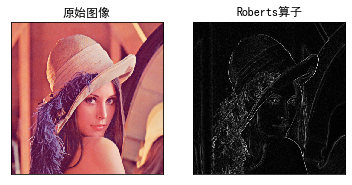

In [141]:
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
#转uint8
absX = cv2.convertScaleAbs(x)     
absY = cv2.convertScaleAbs(y)   
Roberts = cv2.addWeighted(absX,0.5,absY,0.5,0)
 
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
 
#显示图形
titles = [u'原始图像', u'Roberts算子'] 
images = [lenna_img, Roberts] 
for i in range(2): 
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray') 
    plt.title(titles[i]) 
    plt.xticks([]),plt.yticks([]) 
plt.show()

# Prewitt算子

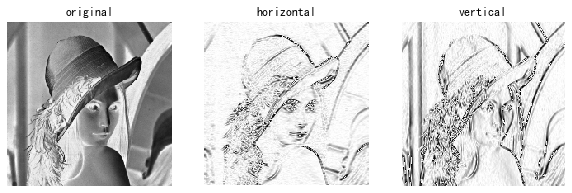

In [142]:
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 
def PreWittOperator(roi, operator_type):
    if operator_type == "horizontal":
        prewitt_operator = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif operator_type == "vertical":
        prewitt_operator = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    else:
        raise ("type Error")
    result = np.abs(np.sum(roi * prewitt_operator))
    return result
 
def PreWittAlogrithm(image, operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = PreWittOperator(image[i - 1:i + 2, j - 1:j + 2], operator_type)
    new_image = new_image * (255 / np.max(image))
    return new_image.astype(np.uint8)
 
    
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.title("original")
plt.imshow(gray_saber, cmap="binary")
plt.axis("off")
plt.subplot(132)
plt.title("horizontal")
plt.imshow(PreWittAlogrithm(gray_saber,"horizontal"),cmap="binary")
plt.axis("off")
plt.subplot(133)
plt.title("vertical")
plt.imshow(PreWittAlogrithm(gray_saber,"vertical"),cmap="binary")
plt.axis("off")
plt.show()

 # Sobel算子

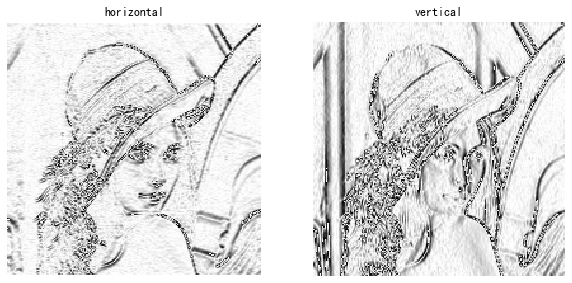

In [143]:

gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 
def SobelOperator(roi, operator_type):
    if operator_type == "horizontal":
        sobel_operator = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    elif operator_type == "vertical":
        sobel_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    else:
        raise ("type Error")
    result = np.abs(np.sum(roi * sobel_operator))
    return result
 

def SobelAlogrithm(image, operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = SobelOperator(image[i - 1:i + 2, j - 1:j + 2], operator_type)
    new_image = new_image * (255 / np.max(image))
    return new_image.astype(np.uint8)
 
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title("horizontal")
plt.imshow(SobelAlogrithm(gray_saber,"horizontal"),cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.title("vertical")
plt.imshow(SobelAlogrithm(gray_saber,"vertical"),cmap="binary")
plt.axis("off")
plt.show()

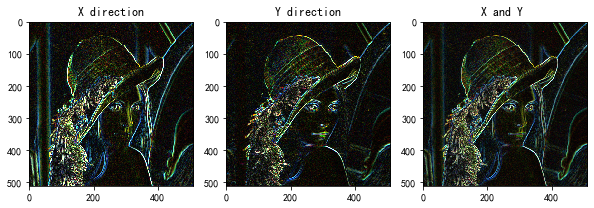

In [144]:
'''Sobel in opencv'''
  
x = cv2.Sobel(img,cv2.CV_16S,1,0)
y = cv2.Sobel(img,cv2.CV_16S,0,1)
  
absX = cv2.convertScaleAbs(x)   # 转回uint8
absY = cv2.convertScaleAbs(y)
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)

plt.figure(figsize=(10, 8))

plt.subplot(131),plt.imshow(absX),plt.title("X direction")
plt.subplot(132),plt.imshow(absY),plt.title("Y direction")
plt.subplot(133),plt.imshow(dst),plt.title("X and Y ")
plt.show()

# Laplacian算子

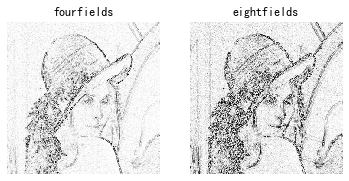

In [145]:

# 首先将原图像进行边界扩展，并将其转换为灰度图。
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))


def LaplaceOperator(roi, operator_type):
    if operator_type == "fourfields":
        laplace_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    elif operator_type == "eightfields":
        laplace_operator = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
    else:
        raise ("type Error")
    result = np.abs(np.sum(roi * laplace_operator))
    return result


def LaplaceAlogrithm(image, operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = LaplaceOperator(image[i - 1:i + 2, j - 1:j + 2], operator_type)
    new_image = new_image * (255 / np.max(image))
    return new_image.astype(np.uint8)
 
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)
        noisy = image + image * gauss
        return noisy

plt.subplot(121)
plt.title("fourfields")
plt.imshow(LaplaceAlogrithm(gray_saber,"fourfields"),cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.title("eightfields")
plt.imshow(LaplaceAlogrithm(gray_saber,"eightfields"),cmap="binary")
plt.axis("off")
plt.show()

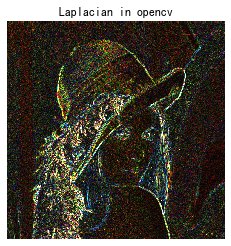

In [146]:
'''Laplacian in opencv'''
gray_lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
dst = cv2.convertScaleAbs(gray_lap)

plt.imshow(dst, cmap="gray"), plt.axis("off")
plt.title("Laplacian in opencv")
plt.show()

# Canny算子

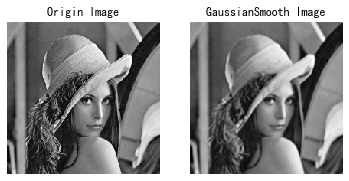

In [147]:

# 首先将原图像进行边界扩展，并将其转换为灰度图。
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 

def GaussianOperator(roi):
    GaussianKernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
    result = np.sum(roi*GaussianKernel/16)
    return result
 
def GaussianSmooth(image):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] =GaussianOperator(image[i-1:i+2,j-1:j+2])
    return new_image.astype(np.uint8)
 
smooth_saber = GaussianSmooth(gray_saber)
plt.subplot(121)
plt.title("Origin Image")
plt.axis("off")
plt.imshow(gray_saber,cmap="gray")
plt.subplot(122)
plt.title("GaussianSmooth Image")
plt.axis("off")
plt.imshow(smooth_saber,cmap="gray")
plt.show()

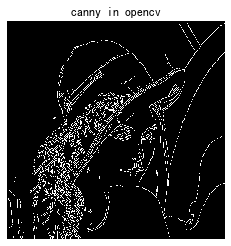

In [148]:
'''canny in opencv'''
blurred = cv2.GaussianBlur(img,(3,3),0)
#灰度图像
gray = cv2.cvtColor(blurred,cv2.COLOR_RGB2GRAY)
#图像梯度
xgrad = cv2.Sobel(gray,cv2.CV_16SC1,1,0)
ygrad = cv2.Sobel(gray,cv2.CV_16SC1,0,1)
#计算边缘
#50和150参数必须符合1：3或者1：2
edge_output = cv2.Canny(xgrad,ygrad,50,150)

dst = cv2.bitwise_and(img,img,mask=edge_output)
plt.imshow(edge_output, cmap=plt.cm.gray),plt.axis("off")
plt.title("canny in opencv")
plt.show()

# Scharr 算子

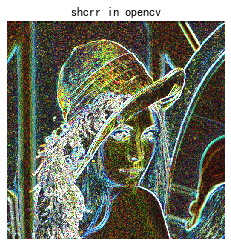

In [149]:
gx = cv2.Scharr(img, ddepth=cv2.CV_16S, dx=1, dy=0)
gy = cv2.Scharr(img, ddepth=cv2.CV_16S, dx=0, dy=1)
gx_abs = cv2.convertScaleAbs(gx)
gy_abs = cv2.convertScaleAbs(gy)
grad = cv2.addWeighted(src1=gx_abs, alpha=0.5, src2=gy_abs, beta=0.5, gamma=0)

plt.imshow(grad, cmap=plt.cm.gray),plt.axis("off")
plt.title("shcrr in opencv")
plt.show()